<a href="https://colab.research.google.com/github/kouchan0708/q-macro/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

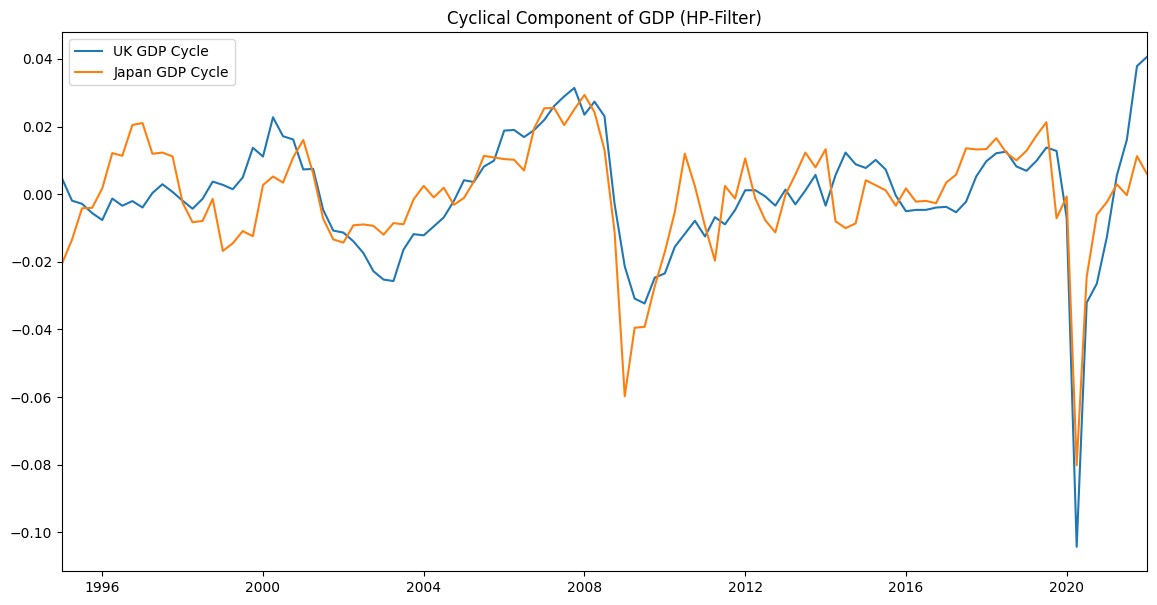

Standard Deviation of UK GDP: 4550.500884617174
Standard Deviation of Japan GDP: 28401.04928394515
Correlation between UK and Japan GDP: 0.923370387273392


In [13]:
  import pandas as pd
  import pandas_datareader.data as web
  import matplotlib.pyplot as plt
  import statsmodels.api as sm
  import numpy as np

  # Set the start and end dates for the data
  start_date = '1995-01-01'
  end_date = '2022-01-01'

  # Download the real GDP data from FRED using pandas_datareader for UK and Japan
  gdp_uk = web.DataReader('GDP', 'fred', start_date, end_date)  # Real GDP for UK, using a global ID for demonstration
  gdp_jp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)  # GDP for Japan

  # Convert the data to log scale
  log_gdp_uk = np.log(gdp_uk)
  log_gdp_jp = np.log(gdp_jp)

  # Apply a Hodrick-Prescott filter to the data to extract the cyclical component
  cycle_uk, trend_uk = sm.tsa.filters.hpfilter(log_gdp_uk, lamb=1600)
  cycle_jp, trend_jp = sm.tsa.filters.hpfilter(log_gdp_jp, lamb=1600)

  # Convert index to datetime for plotting
  gdp_uk.index = pd.to_datetime(gdp_uk.index)
  gdp_jp.index = pd.to_datetime(gdp_jp.index)

  # Plot the cyclical components for UK and Japan
  plt.figure(figsize=(14, 7))
  plt.plot(gdp_uk.index, cycle_uk, label="UK GDP Cycle")
  plt.plot(gdp_jp.index, cycle_jp, label="Japan GDP Cycle")
  plt.legend()
  plt.title('Cyclical Component of GDP (HP-Filter)')
  plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))  # Limit x-axis to specified date range
  plt.show()

  # Calculate standard deviation
  std_dev_uk = np.std(gdp_uk['GDP'])
  std_dev_jp = np.std(gdp_jp['JPNRGDPEXP'])

  # Calculate correlation coefficient
  correlation = np.corrcoef(gdp_uk['GDP'], gdp_jp['JPNRGDPEXP'])[0, 1]

  # Print results
  print(f"Standard Deviation of UK GDP: {std_dev_uk}")
  print(f"Standard Deviation of Japan GDP: {std_dev_jp}")
  print(f"Correlation between UK and Japan GDP: {correlation}")
